Best Hyperparameters: {'n_neighbors': 7}
Accuracy: 0.7422222222222222
Precision: 0.7591859909637686
Recall: 0.7422222222222222
F1 Score: 0.7457510305889317
Confusion matrix:
 [[37 19  5  0]
 [10 32  1  1]
 [16  2 34  1]
 [ 2  1  0 64]]


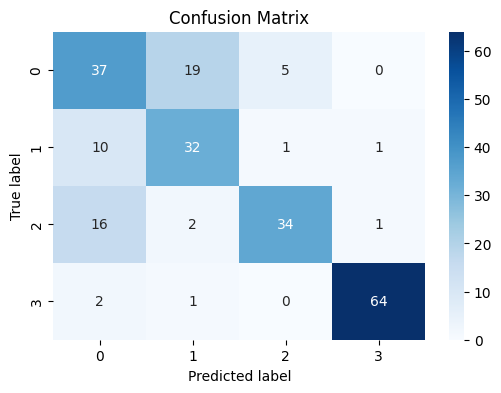

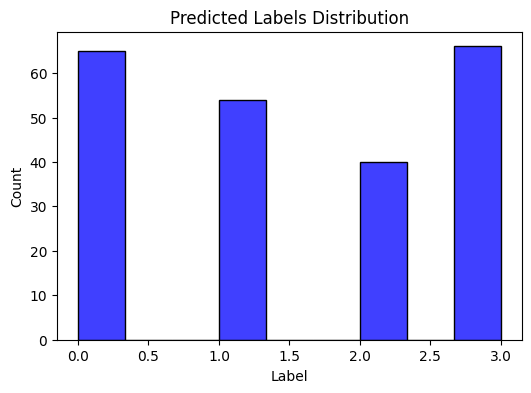

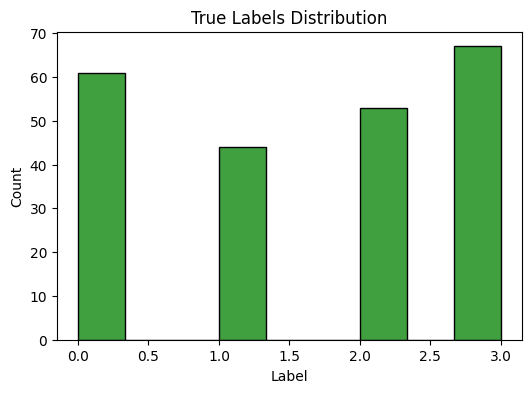

In [5]:
import os
import cv2
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Define the path to the folder containing the training images
train_dir = '../../datasets/dataset1/train/'

# Define the classes and their corresponding numerical labels
class_labels = ['cloudy', 'rain', 'shine', 'sunrise']

# Create a dictionary that maps each label to a numerical value
label_dict = {k: v for v, k in enumerate(class_labels)}

# Read the images from the training folder, resize them to 64x64 pixels, and flatten them into feature vectors
train_images = []
train_labels = []
for c in class_labels:
    class_dir = os.path.join(train_dir, c)
    for file in os.listdir(class_dir):
        img = cv2.imread(os.path.join(class_dir, file))
        img_resized = cv2.resize(img, (128, 128))
        train_images.append(img_resized.flatten())
        train_labels.append(label_dict[c])
X_train = np.array(train_images)
y_train = np.array(train_labels)

# Split the dataset into a training set and a validation set
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Define the range of hyperparameters to search over
param_grid = {'n_neighbors': [3, 5,  7 ,  9 , 11]}

# Perform a grid search with 5-fold cross-validation to find the best hyperparameters
grid_search = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5, n_jobs=-1)
grid_search.fit(X_train, y_train)

# Get the best hyperparameters and train a KNN classifier with them
best_params = grid_search.best_params_
clf = KNeighborsClassifier(**best_params)
clf.fit(X_train, y_train)

# Evaluate the performance of the model on the validation set using several metrics
y_pred = clf.predict(X_val)
accuracy = accuracy_score(y_val, y_pred)
precision = precision_score(y_val, y_pred, average='weighted')
recall = recall_score(y_val, y_pred, average='weighted')
f1 = f1_score(y_val, y_pred, average='weighted')
cm = confusion_matrix(y_val, y_pred)

# Print the metrics and the best hyperparameters
print(f"Best Hyperparameters: {best_params}")
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")
print("Confusion matrix:\n", cm)

# Visualize the confusion matrix, predicted labels distribution, and true labels distribution
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()

plt.figure(figsize=(6, 4))
sns.histplot(y_pred, color='blue')
plt.title('Predicted Labels Distribution')
plt.xlabel('Label')
plt.ylabel('Count')
plt.show()

plt.figure(figsize=(6, 4))
sns.histplot(y_val, color='green')
plt.title('True Labels Distribution')
plt.xlabel('Label')
plt.ylabel('Count')
plt.show()


TEST PHASE

In [6]:
# Leggi le immagini di test e crea le matrici di feature e target
test_dir = '../../datasets/dataset1/test/'
test_images = []
test_labels = []
for c in class_labels:
    class_dir = os.path.join(test_dir, c)
    for file in os.listdir(class_dir):
        img = cv2.imread(os.path.join(class_dir, file))
        img_resized = cv2.resize(img, (128, 128))
        test_images.append(img_resized.flatten())
        test_labels.append(label_dict[c])
X_test = np.array(test_images)
y_test = np.array(test_labels)


# Valuta le prestazioni del modello sul dataset di test
accuracy = clf.score(X_test, y_test)
print(f"Accuracy: {accuracy}")

y_pred = clf.predict(X_test)

# Calcola le metriche di valutazione del modello
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Stampa le metriche
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")

# Valuta il modello su ogni classe utilizzando la confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion matrix:\n", cm)

# Visualizza la confusion matrix come un grafico

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()

# Visualizza la distribuzione delle etichette predette dal modello sui dati di validation
plt.figure(figsize=(6,4))
sns.histplot(y_pred, color='blue')
plt.title('Predicted Labels Distribution')
plt.xlabel('Label')
plt.ylabel('Count')
plt.show()

# Visualizza la distribuzione delle etichette reali sui dati di validation
plt.figure(figsize=(6,4))
sns.histplot(y_test, color='green')
plt.title('True Labels Distribution')
plt.xlabel('Label')
plt.ylabel('Count')
plt.show()



ValueError: X has 49152 features, but KNeighborsClassifier is expecting 12288 features as input.

La confusion matrix mostra la distribuzione delle previsioni corrette e sbagliate del modello per ogni classe. Dalla confusion matrix si può vedere che il modello ha qualche difficoltà a distinguere tra le classi "cloudy" e "rain", ma ha ottenuto buoni risultati per le altre due classi.